# Predicción de cancelación de clientes en Telecom Interconnect

## Carga de librerías y de datos

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
df_contract = pd.read_csv('/Users/diana/Desktop/PRACTICUM DS/final_provider/contract.csv')
df_internet = pd.read_csv('/Users/diana/Desktop/PRACTICUM DS/final_provider/internet.csv')
df_personal = pd.read_csv('/Users/diana/Desktop/PRACTICUM DS/final_provider/personal.csv')
df_phone = pd.read_csv('/Users/diana/Desktop/PRACTICUM DS/final_provider/phone.csv')

## Exploración de datos

### Contrato de clientes

In [7]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
df_contract['Type'].value_counts()

Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [10]:
df_contract.duplicated().sum()

0

In [11]:
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


* No hay datos ausentes ni duplicados.
* Lo mínimo a pagar al mes ha sido 18 y lo máximo 118. La mayoría (75%) paga 89.
* Hay que cambiar los tipos de datos de TotalCharges y fechas.

In [12]:
df_contract['EndDate'].value_counts()

EndDate
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64

In [11]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d')

In [12]:
df_contract['BeginDate'].dt.year.value_counts()

BeginDate
2019    1957
2014    1344
2018    1030
2015     852
2017     845
2016     763
2020     244
2013       8
Name: count, dtype: int64

In [13]:
df_contract['BeginDate'].dt.month.value_counts()

BeginDate
2     804
1     623
9     623
11    621
12    604
10    601
3     590
8     532
6     522
7     518
4     511
5     494
Name: count, dtype: int64

In [14]:
df_contract['BeginDate'].dt.day.value_counts()

BeginDate
1    7043
Name: count, dtype: int64

In [15]:
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

In [16]:
df_contract.columns = (df_contract.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True).str.lower())
df_contract.rename(columns={"customer_i_d": "customer_id"}, inplace=True)

In [19]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


Hay datos ausentes en la columna 'total_charges'.

In [17]:
filter = df_contract.query("total_charges.isna()")
filter

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Tenemos 11 datos ausentes y corresponden a personas que no han cancelado su plan y que recién se han unido a la empresa, por lo que se eliminarán estos datos.

In [18]:
df_contract = df_contract.dropna().reset_index(drop=True)

In [22]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7032 non-null   object        
 1   begin_date         7032 non-null   datetime64[ns]
 2   end_date           7032 non-null   object        
 3   type               7032 non-null   object        
 4   paperless_billing  7032 non-null   object        
 5   payment_method     7032 non-null   object        
 6   monthly_charges    7032 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 439.6+ KB


* Se cambió el tipo de datos de total_charges. 
* Se cambió a datetime begin_date, sin embargo end_date aún no se cambiará porque contiene dos tipos de datos.
* Se cambiaron los nombres de las a columnas a formato snake_case.

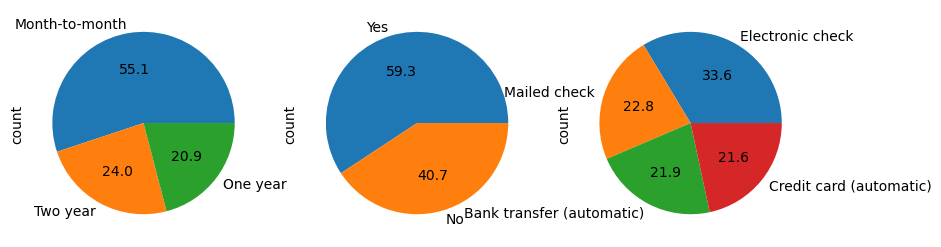

In [23]:
cat_var =  ['type', 'paperless_billing', 'payment_method']

for i, var in enumerate(cat_var):
    plt.subplot(1, len(cat_var), i+1)
    df_contract[var].value_counts().plot.pie(fontsize=10, figsize=(10,10), autopct="%.1f")
    plt.gca().set_aspect('equal')

plt.show()

* Más de la mitas de contratos han sido mensuales.
* La mayoría prefiere su factura por email, pero no parece relevante.
* El método de pago al parece se distribuye proporcionalmnete, aunque un mayor porcentaje prefiere por cheque electrónico.

### Servicio de internet

In [24]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [25]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [26]:
df_internet.duplicated().sum()

0

In [27]:
df_internet['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

* No hay datos ausentes ni duplicados. Solo hay que cambiar el nombre de las columnas.

In [20]:
df_internet.columns = (df_internet.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True).str.lower())
df_internet.rename(columns={"customer_i_d": "customer_id", "streaming_t_v": "streaming_tv" }, inplace=True)

In [29]:
df_internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

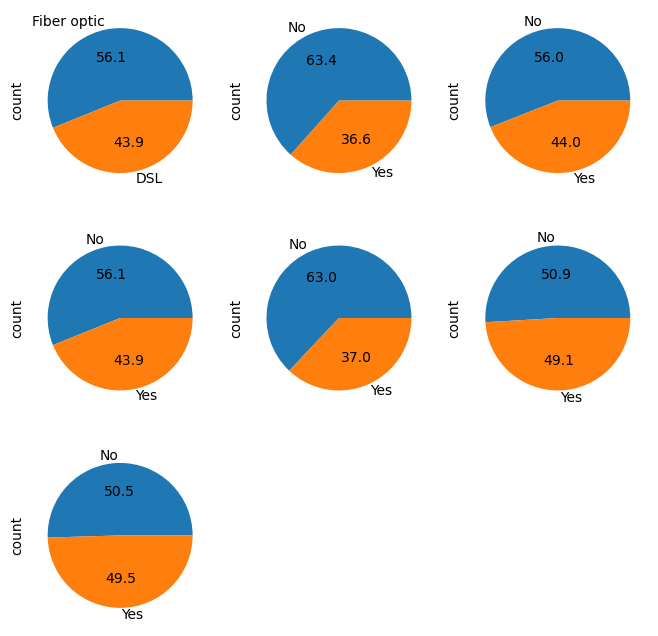

In [30]:
cat_var =  ['internet_service', 'online_security', 'online_backup', 'device_protection', 
            'tech_support', 'streaming_tv','streaming_movies']

for i, var in enumerate(cat_var):
    plt.subplot(3,3, i+1)
    df_internet[var].value_counts().plot.pie(fontsize=10, figsize=(8, 8), autopct="%.1f")
    plt.gca().set_aspect('equal')

plt.show()

* Se puede decir que más de la mitas de los clientes si contratan o contraton los servicios de internet y prefieren más la fibra óptica.
* Los serviciso de streaming no tienen mucho diferencia. 

### Datos personales de los clientes

In [31]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [32]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [33]:
df_personal['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

* No Hay datos ausentes ni duplicados.
* Cambio de nombre de columnas

In [21]:
df_personal.columns = (df_personal.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True).str.lower())
df_personal.rename(columns={"customer_i_d": "customer_id"}, inplace=True)

In [35]:
df_personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

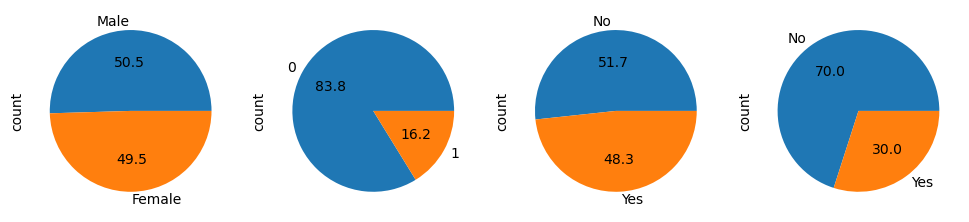

In [36]:
cat_var =  ['gender', 'senior_citizen', 'partner', 'dependents']

for i, var in enumerate(cat_var):
    plt.subplot(1, len(cat_var), i+1)
    df_personal[var].value_counts().plot.pie(fontsize=10, figsize=(12,12), autopct="%.1f")
    plt.gca().set_aspect('equal')

plt.show()

* La myoría de clientes no son jubilados y no tienen familiares dependientes.
* Se distribuye en casi igual proporción hombre y mujeres y los que tienen pareja.

### Servicio de teléfono

In [37]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [38]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [39]:
df_phone.duplicated().sum()

0

In [40]:
df_phone['MultipleLines'].value_counts()

MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

* No hay datos ausentes o suplicados.
* Cambio de nombre de columnas.

In [22]:
df_phone.rename(columns={"customerID": "customer_id", "MultipleLines": "multiple_lines"}, inplace=True)

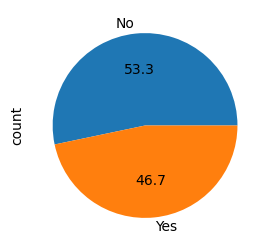

In [42]:
df_phone['multiple_lines'].value_counts().plot.pie(fontsize=10, figsize=(3,3), autopct="%.1f")

plt.show()

* Hay una diferencia de 7 puntos entre los que tienen el servicio de multiples lineas.

## Análisis exploratorio de datos

* Para el análisis exploratorio se unirán las tablas por medio de la columna de código de clientes.

In [23]:
df_provider = df_contract.merge(df_internet, on='customer_id', how='left')
df_provider = df_provider.merge(df_personal, on='customer_id', how='left')
df_provider = df_provider.merge(df_phone, on='customer_id', how='left')
df_provider.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [44]:
filter = df_provider.query("internet_service.isna() and multiple_lines.isna()")
filter

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines


* No hay clientes que no hayan tenido o no tienen contratos.

Nuestro objetivo será si los clientes que han cancelado su contrato por lo que creará una columna con la información de end_date.

In [24]:
df_provider['cancel'] = np.where(df_provider['end_date'] == 'No', 0, 1)

In [46]:
df_provider['cancel'].value_counts()

cancel
0    5163
1    1869
Name: count, dtype: int64

También se creará nuevas columnas para el año y mes en que los clientes empezaron, por lo que se segmentará 'begin_date' para el modelo.

In [25]:
df_provider['begin_year'] = df_provider['begin_date'].dt.year
df_provider['begin_month'] = df_provider['begin_date'].dt.month

Llenaremos los datos ausentes de las columnas con 'no_plan' ya que estos clientes no tienen plan en ese servicio.

In [26]:
df_provider.iloc[: , 8:20] = df_provider.iloc[:, 8:20].fillna('no_plan')

print(df_provider.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7032 non-null   object        
 1   begin_date         7032 non-null   datetime64[ns]
 2   end_date           7032 non-null   object        
 3   type               7032 non-null   object        
 4   paperless_billing  7032 non-null   object        
 5   payment_method     7032 non-null   object        
 6   monthly_charges    7032 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   internet_service   7032 non-null   object        
 9   online_security    7032 non-null   object        
 10  online_backup      7032 non-null   object        
 11  device_protection  7032 non-null   object        
 12  tech_support       7032 non-null   object        
 13  streaming_tv       7032 non-null   object        
 14  streamin

### Gráfico de barras

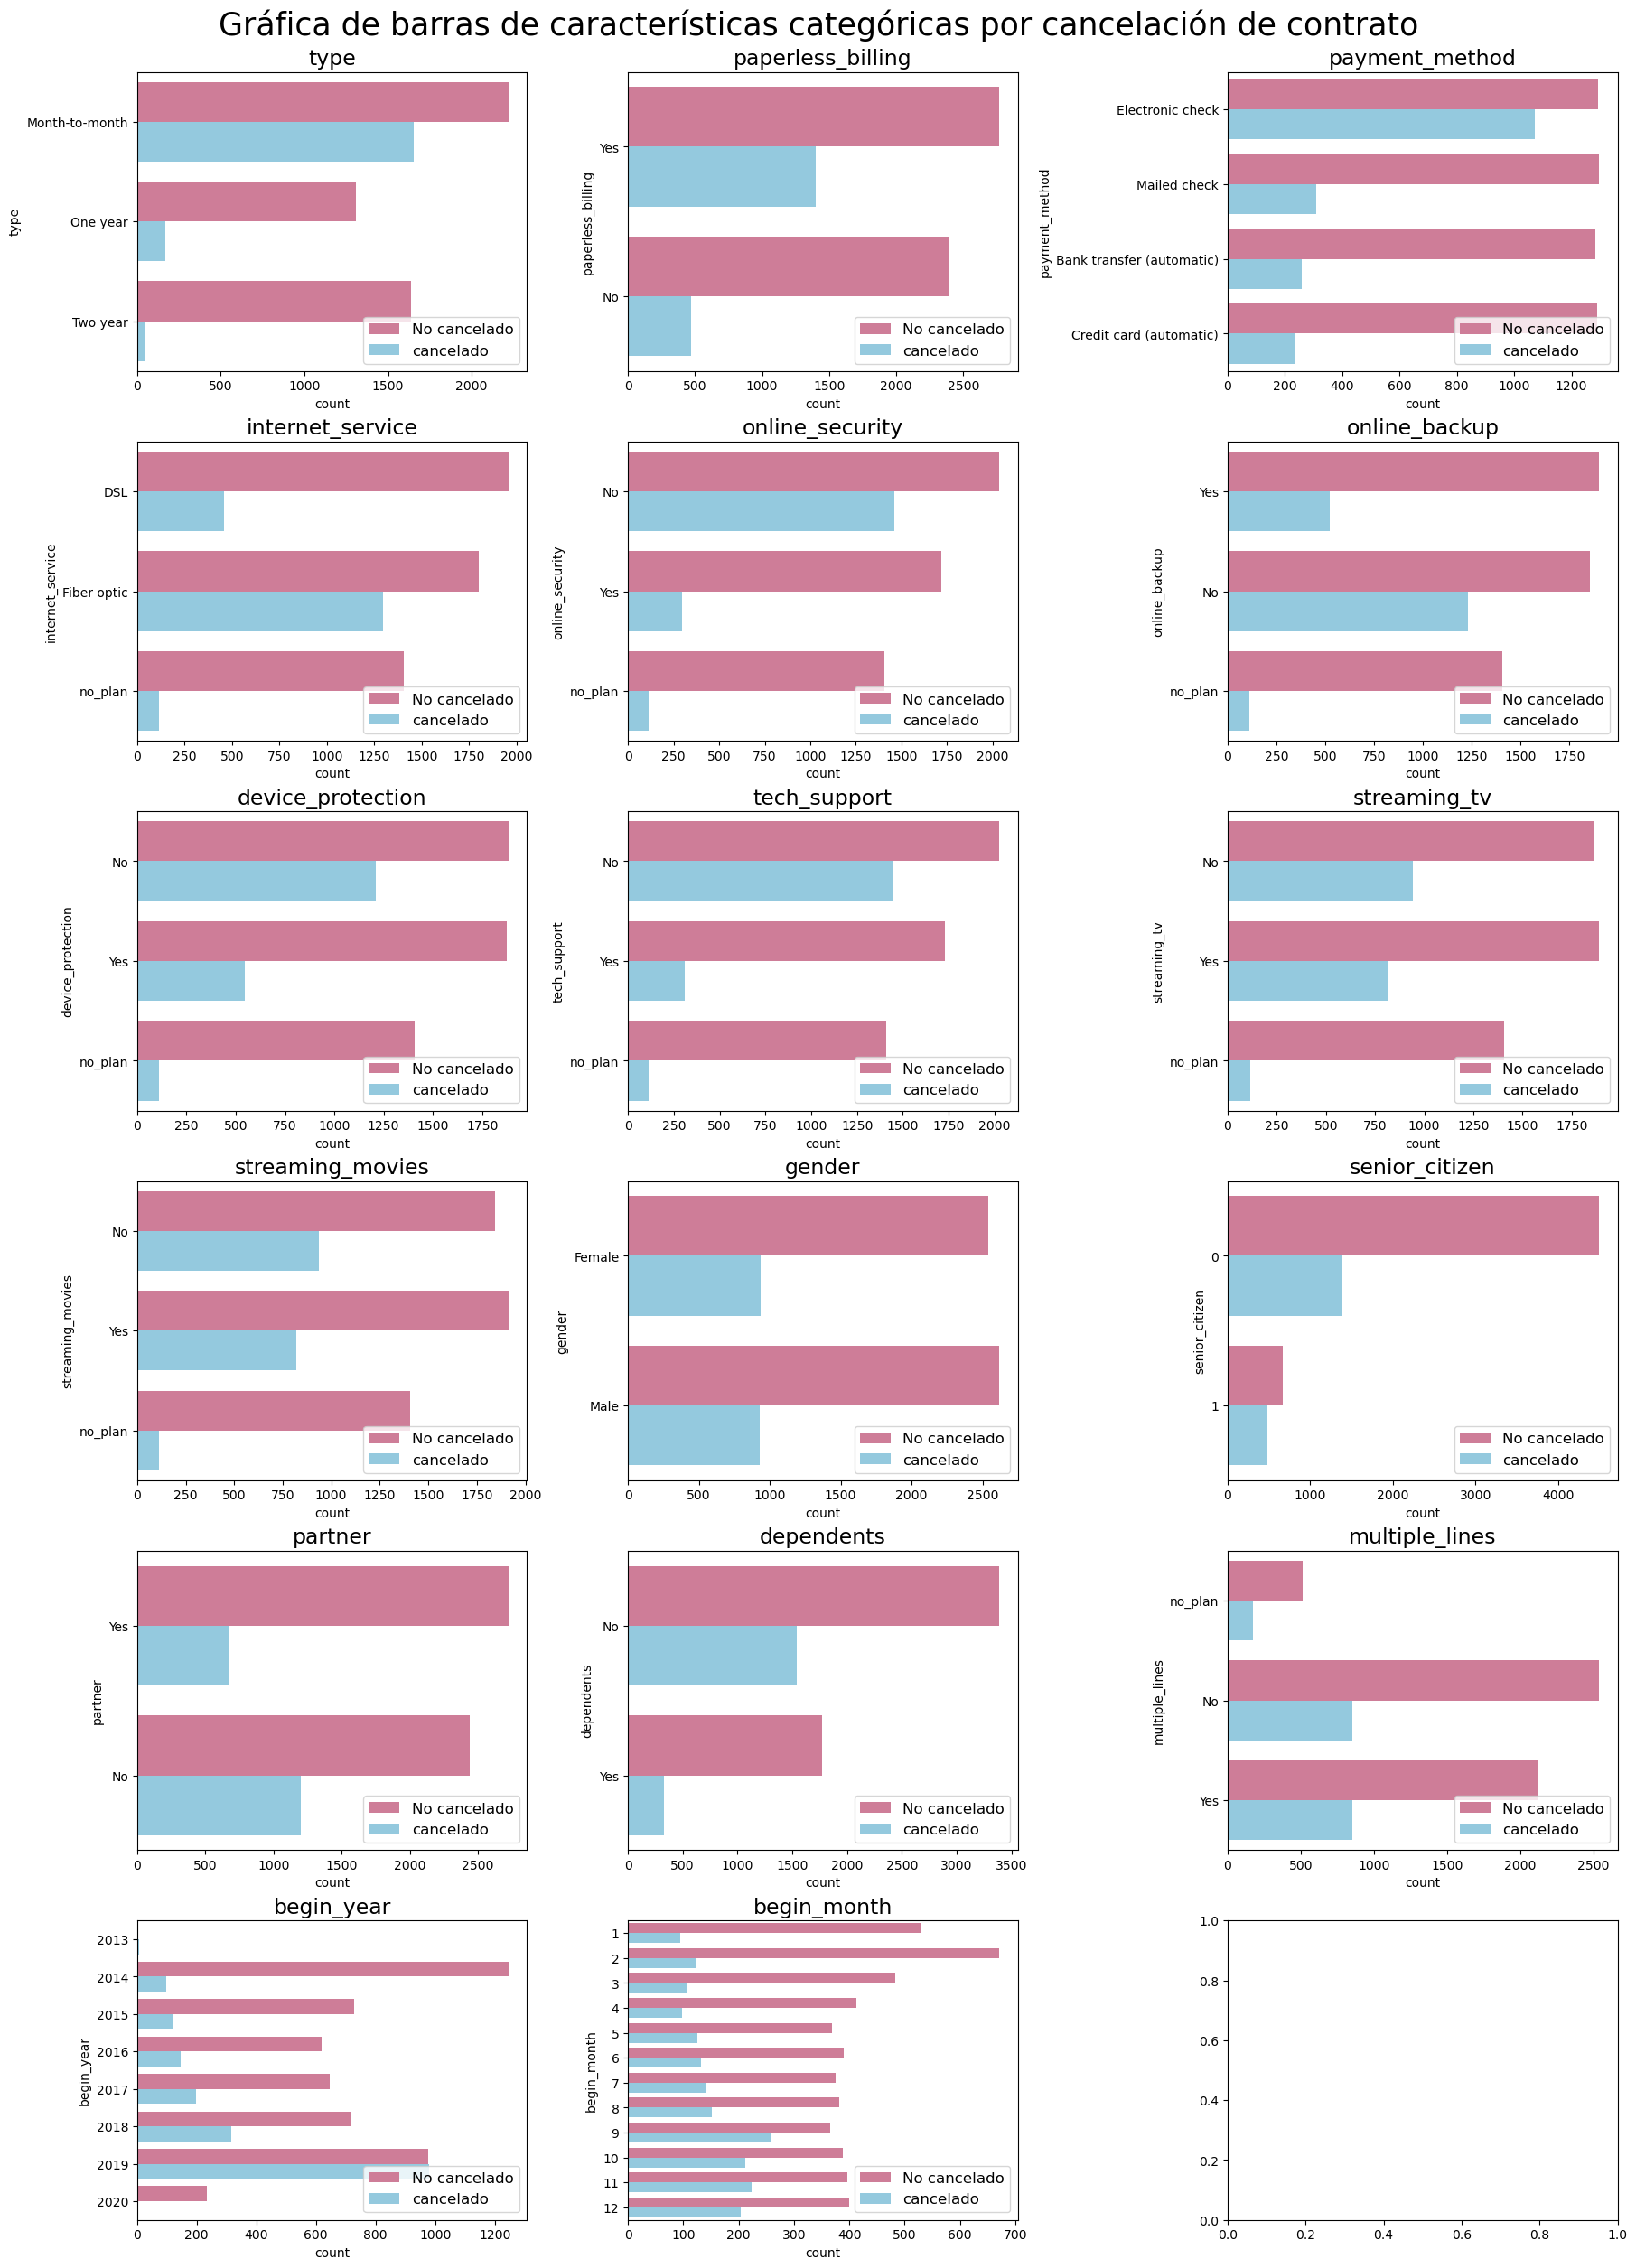

In [49]:
categorical_columns = df_provider.drop(['customer_id', 'begin_date', 'monthly_charges', 'total_charges', 'end_date'], axis=1)

fig, axs = plt.subplots(6, 3, figsize=(18,25), constrained_layout = True)
fig.suptitle("Gráfica de barras de características categóricas por cancelación de contrato", fontsize=25)

for column, ax in zip(categorical_columns.columns.drop('cancel'), axs.ravel()):
    count_plot = sns.countplot(data=df_provider, 
                               y=column, 
                               hue='cancel', 
                               palette=['palevioletred', 'skyblue'], 
                               ax=ax)
    ax.set_title(f'{column}', fontsize=17)
    ax.legend(['No cancelado', 'cancelado'], loc='lower right', fontsize=12)  
    
plt.show()

* Los clientes de mes a mes tienen más probabilidades de cancelar su contrato que los clientes con otros tipos de planes.
* Los clientes que pagan con cheques electrónicos tienen más probabilidades de abandonar su cuenta que los clientes que pagan con otros métodos.
* Ambos sexos tienen la misma probabilidad de abandonar su cuenta.
* Los clientes que no tienen servicios de Internet adicionales generalmente tienen más probabilidades de abandonar su cuenta que los clientes que sí los tienen. Los clientes con 6 servicios de Internet adicionales son los que tienen menos probabilidades de abandonar su cuenta.
* Los que tienen cargas familiares son más problables de abandonar su cuenta.
* Los que tienen y no tienen multuples lineas son igual de probables de cancelar contratos.
* Los clientes que no cuentan con servicios de internet adicionales suelen tener más probabilidades de abandonar el servicio que los clientes que sí los tienen.

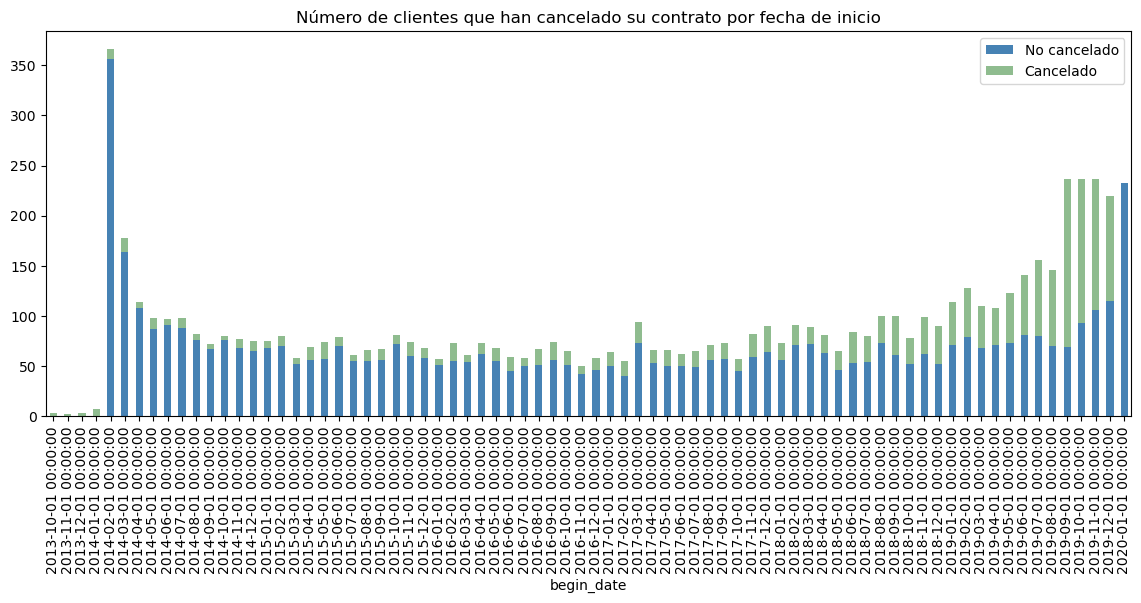

In [50]:
cancel_by_date = df_provider.groupby(['begin_date', 'cancel']).size().reset_index().pivot(columns='cancel', index='begin_date', values=0)

cancel_by_date.plot(kind='bar', 
                     stacked=True, 
                     figsize=(14, 5), 
                     color=['steelblue', 'darkseagreen'])

plt.title('Número de clientes que han cancelado su contrato por fecha de inicio')
plt.legend(['No cancelado', 'Cancelado'])

plt.show()

* Hay datos desde 2013 hasta 2020 de inicios de contratos.
* Todos los del 2013 y enero de 2014 abandonaron sus cuentas.
* Febrero de 2014 fue el mejor mes para la empresa ya que pocos abandonaron.
* Los clientes que iniciaron sus contratos entre 2014 y 2018 no abondaron la empresa.
* En 2019 han tenido más clientes pero alrededor de 50% abandonaron su cuenta.
* En 2020 no han tenido abandonos.
* Los nuevos clientes tienen más probabilidades de irse que los antiguos.

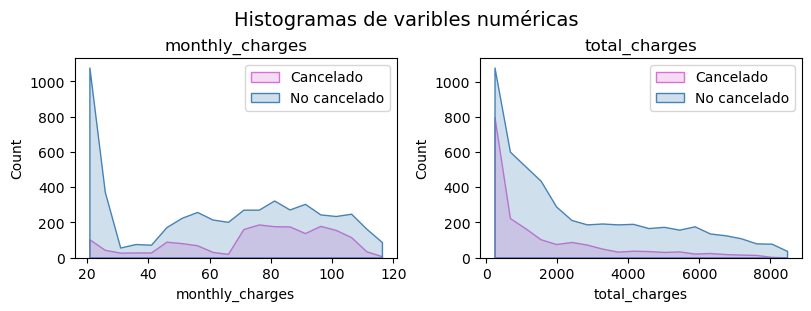

In [51]:
numeric_columns = df_provider[['monthly_charges', 'total_charges']]

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle('Histogramas de varibles numéricas', fontsize=14)

for column, ax in zip(numeric_columns, axs.ravel()):
    sns.histplot(df_provider, 
                 x=column, 
                 palette=['steelblue', 'orchid'], 
                 bins=20, 
                 hue='cancel', 
                 ax=ax, 
                 element='poly')
    ax.set_title(f'{column}')
    ax.legend(labels=['Cancelado', 'No cancelado']) 
    
plt.show()

* La distribución de los cargos mensuales tiene un pico grande en 20 entre los que no han cancelado su planes. Se puede decir que la mayoría de los que cancelan sus contratos son los que pagan más de 70.
* Los cargos totales están muy sesgados hacia la izquiera, se puede decir que no muchos se han quedado mucho tiempo y que la mayoría de los que no han cancelado no pagan mucho.

**Preguntas aclaratorias**

- ¿Qué tipo de clientes se pueden fugar con mayor probabilidad?
- ¿Qué porcentaje de clientes con mayor probabilidad de fuga recibirán una oferta de promoción?
- ¿Cuál es el objetivo del modelo?
- ¿Qué modelos se utilizaran en el proyecto?
- ¿Qué métrica se utilizará para el evaluar el modelo y qué minimo se requiere? 

**Plan de trabajo**

1. Primero se corregirá los tipos de datos y nombres de las columnas y se hará un analisis exploratorio de datos.
2. Se investigará las variables categóricas que parecen intuitivamente ser las más importantes a la hora de predecir.
4. Se determinará las características y el objetivo para el modelo, y se utilizará la codificación one-hot para transformar variables categóricas y se estandarizará las varibles numéricas
4. Se construirá un modelo predictivo, para una tarea de clasificación, empleando algoritmos de aumento de gradiente, específicamente Random Forest, Gradient Boosting. 
5. Se hará un ajuste de hiperámetros y se evaluará los modelos con la metrica AUC.

## Preprocesamiento de datos

In [2]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.pipeline import Pipeline

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

import lightgbm as lgb
import xgboost as xgb

Se sustituyeron las columnas con dos categorías con 0 y 1.

In [27]:
df_provider['paperless_billing'] = np.where(df_provider['paperless_billing'] == 'Yes', 1, 0)
df_provider['gender'] = np.where(df_provider['gender'] == 'Male', 1, 0)
df_provider['partner'] = np.where(df_provider['partner'] == 'Yes', 1, 0)
df_provider['dependents'] = np.where(df_provider['dependents'] == 'Yes', 1, 0)

df_provider.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,cancel,begin_year,begin_month
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,DSL,No,...,No,No,0,0,1,0,no_plan,0,2020,1
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.50,DSL,Yes,...,No,No,1,0,0,0,No,0,2017,4
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,DSL,Yes,...,No,No,1,0,0,0,No,1,2019,10
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,No,No,1,0,0,0,no_plan,0,2016,5
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,0,0,0,0,No,1,2019,9


Se definieron las columnas de características y el objetivo, y se eliminaron las que no son relevantes para el modelo.

In [28]:
target = df_provider['cancel']
features = df_provider.drop(['customer_id', 'begin_date', 'end_date', 'cancel'], axis=1)

print('Target:')
print()
print(target.info())
print()
print('Features:')
print()
print(features.info())

Target:

<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: cancel
Non-Null Count  Dtype
--------------  -----
7032 non-null   int32
dtypes: int32(1)
memory usage: 27.6 KB
None

Features:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7032 non-null   object 
 1   paperless_billing  7032 non-null   int32  
 2   payment_method     7032 non-null   object 
 3   monthly_charges    7032 non-null   float64
 4   total_charges      7032 non-null   float64
 5   internet_service   7032 non-null   object 
 6   online_security    7032 non-null   object 
 7   online_backup      7032 non-null   object 
 8   device_protection  7032 non-null   object 
 9   tech_support       7032 non-null   object 
 10  streaming_tv       7032 non-null   object 
 11  streaming_movies   7032 non-null   object

Se divieron los datos para entrenamiento y para validación.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size = 0.25, random_state = 12345)

print(f'Features Train Shape: {X_train.shape}')
print(f'Features Test Shape: {X_test.shape}')
print()
print(f'Target Train Shape: {y_train.shape}')
print(f'Target Test Shape: {y_test.shape}')

Features Train Shape: (5274, 19)
Features Test Shape: (1758, 19)

Target Train Shape: (5274,)
Target Test Shape: (1758,)


Se definieron las columnas que se codificaran con OHE, el tranformador para las pipelines y las métricas

In [30]:
# Columnas con más de dos categorías
ohe_columns = ['type', 'payment_method', 'internet_service', 'multiple_lines',
               'online_security', 'online_backup', 'device_protection',
               'tech_support', 'streaming_tv', 'streaming_movies']

# Definir los pasos para el pipeline
preprocessor = make_column_transformer((OneHotEncoder(drop='first'), ohe_columns),
                                       (StandardScaler(), ['monthly_charges', 'begin_month', 'begin_year', 'total_charges']),
                                       remainder='passthrough')

# Metrícas para el cross-validate and GridSearchCV
scorers = {'roc_auc': 'roc_auc',
          'accuracy': 'accuracy',
          'recall': 'recall',
          'f1': 'f1'}

Se definieron funciones para mostrat los resultados de las métricas.

In [57]:
#Función para mostrar las mejores metricas en CV
def cv_results(cv_object, main_scorer, *add_scores):
    
    main_scorer_avg = cv_object[f'test_{main_scorer}'].mean()
    results = pd.DataFrame(data={f'{main_scorer}': [main_scorer_avg]})
    
    for score in add_scores:
        score_avg = cv_object[f'test_{score}'].mean()
        results[f'{score}'] = score_avg
    
    return results

In [43]:
# Función para mostrar los mejores resultados en gridsearchcv
def gscv_results(gscv_object, main_scorer, *add_scores):
    
    cv_results = pd.DataFrame(gscv_object.cv_results_).sort_values(by=f'mean_test_{main_scorer}', ascending=False)

    best_params = gscv_object.best_params_
    best_index = gscv_object.best_index_

    best_score = gscv_object.best_score_.round(4)
    results = pd.DataFrame(data={f'{main_scorer}':[best_score]})
    
    for score in add_scores:
        results[f'{score}'] = cv_results.loc[best_index, f'mean_test_{score}'].round(4)

    return best_params, results

## Modelamiento 

### Regresión logística

#### Sin equilibrio de clases

In [175]:
%%time
model_lr = LogisticRegression(solver='liblinear', random_state=123)

pipeline = make_pipeline(preprocessor, model_lr)

lr_cv = cross_validate(pipeline, X_train, y_train, scoring=scorers, cv=5)

lr_results = cv_results(lr_cv, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Resultados del modelo de regresión lineal:')
display(lr_results.round(2))

Resultados del modelo de regresión lineal:


,roc_auc,accuracy,recall,f1
0,0.84,0.8,0.52,0.58


CPU times: total: 516 ms
Wall time: 341 ms


#### Parámetro class_weight

In [176]:
%%time
model_lr = LogisticRegression( class_weight = 'balanced', solver='liblinear', random_state=12345)

pipeline = make_pipeline(preprocessor, model_lr)

lr_wc_cv = cross_validate(pipeline, X_train, y_train, scoring=scorers, cv=5)

lr_wc_results = cv_results(lr_wc_cv, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Resultados del modelo de regresión lineal con class_weight:')
display(lr_wc_results.round(2))

Resultados del modelo de regresión lineal con class_weight:


,roc_auc,accuracy,recall,f1
0,0.84,0.74,0.79,0.62


CPU times: total: 438 ms
Wall time: 327 ms


In [179]:
lr_table_results = pd.concat([lr_results, lr_wc_results])

lr_table_results.index = ['LR', 'LR class_weight']

print('LR Results Summary:')
display(lr_table_results.sort_values(by='roc_auc', ascending=False).round(3))

LR Results Summary:


,roc_auc,accuracy,recall,f1
LR,0.837,0.798,0.524,0.579
LR class_weight,0.837,0.742,0.787,0.619


El resultado fue igual para AUC, sin embargo con el equilibrio de clases mejoró considerablemente la metrica recall y f1.

 ### Bosque Aleatorio

#### Sin equilibrio de clases

In [183]:
%%time
pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=12345))

grid_param = {"randomforestclassifier__n_estimators": [25, 50, 75, 90, 100],
              "randomforestclassifier__max_depth":[3,4,5,8,15],
              "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,25,30],
              "randomforestclassifier__max_leaf_nodes": [2, 5,10]}

gridsearch = GridSearchCV(pipe, grid_param, cv=3, scoring=scorers, refit='roc_auc', return_train_score=True,) 

rf_model = gridsearch.fit(X_train, y_train)

CPU times: total: 3min 12s
Wall time: 8min 59s


In [185]:
rf_params, rf_results = gscv_results(rf_model, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Mejores parámetros para Random Forest sin equilibrio de clases:')
print(rf_params)
print()
print('Mejores resultados para Random Forest sin equilibrio de clases:')
display(rf_results)

Mejores parámetros para Random Forest sin equilibrio de clases:
{'randomforestclassifier__max_depth': 8, 'randomforestclassifier__max_leaf_nodes': 10, 'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__n_estimators': 25}

Mejores resultados para Random Forest sin equilibrio de clases:


,roc_auc,accuracy,recall,f1
0,0.8518,0.802,0.4087,0.523


#### Parámetro Class_weight

In [90]:
%%time
pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=12345, class_weight='balanced'))

grid_param = {"randomforestclassifier__n_estimators": [25, 50, 75, 90, 100],
              "randomforestclassifier__max_depth":[3,4,5,8,15],
              "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,25,30],
              "randomforestclassifier__max_leaf_nodes": [2, 5,10]}

gridsearch = GridSearchCV(pipe, grid_param, cv=3, scoring=scorers, refit='roc_auc', return_train_score=True,) 

rf_cw = gridsearch.fit(X_train, y_train)

CPU times: total: 3min 42s
Wall time: 9min 15s


In [180]:
rf_wc_params, rf_wc_results = gscv_results(rf_cw, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Mejores parámetros para Random Forest con class_weight:')
print(rf_wc_params)
print()
print('Mejores resultados para Random Forest con class_weight:')
display(rf_wc_results)

Mejores parámetros para Random Forest con class_weight:
{'randomforestclassifier__max_depth': 8, 'randomforestclassifier__max_leaf_nodes': 10, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 25}

Mejores resultados para Random Forest con class_weight:


,roc_auc,accuracy,recall,f1
0,0.8514,0.7533,0.8145,0.6371


In [186]:
rf_table_results = pd.concat([rf_results, rf_wc_results])

rf_table_results.index = ['RF', 'RF class_weight']

print('RF Results Summary:')
display(rf_table_results.sort_values(by='roc_auc', ascending=False).round(3))

RF Results Summary:


,roc_auc,accuracy,recall,f1
RF,0.852,0.802,0.409,0.523
RF class_weight,0.851,0.753,0.814,0.637


El resultado fue casi para AUC, sin embargo el quilibrio de clases mejoró considerablemente la metrica accuracy, recall y f1.

### Catboost

In [141]:
X_train_copy = X_train.copy()

In [142]:
cat_columns = ['type', 'paperless_billing', 'payment_method', 
               'gender', 'senior_citizen', 'partner', 'dependents', 
               'internet_service', 'online_security', 'online_backup',
               'device_protection', 'tech_support', 'streaming_tv',
               'streaming_movies', 'multiple_lines']

In [143]:
# Escalar datos numéricos
numeric_scaler = StandardScaler()

numeric_columns = ['monthly_charges', 'begin_year', 'begin_month', 'total_charges']

X_train_copy[numeric_columns] = numeric_scaler.fit_transform(X_train_copy[numeric_columns])

X_train_copy.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,begin_year,begin_month
2160,One year,0,Mailed check,-1.482494,-0.889562,no_plan,no_plan,no_plan,no_plan,no_plan,no_plan,no_plan,0,0,0,0,No,1.084831,-1.521779
3808,Two year,1,Credit card (automatic),0.790277,1.783331,DSL,Yes,Yes,Yes,Yes,Yes,Yes,1,0,1,0,Yes,-1.469593,-1.241370
2509,Month-to-month,1,Electronic check,0.823457,-0.040800,Fiber optic,No,Yes,No,No,No,Yes,0,1,0,0,Yes,0.063061,1.282309
3830,One year,1,Electronic check,1.352664,-0.813899,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,0,0,0,0,No,1.084831,0.441083
2568,Month-to-month,1,Mailed check,-0.336155,-0.986440,DSL,No,No,No,No,No,Yes,0,0,0,0,No,1.084831,1.562718


#### Catboost sin equilibrio de clases

In [67]:
%%time
catboost = CatBoostClassifier(iterations=150, silent=True, cat_features = cat_columns, loss_function='Logloss', random_state=12345)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

cb_gscv = GridSearchCV(catboost, 
                       param_grid=grid, 
                       scoring=scorers,
                       refit='roc_auc', 
                       cv=3, 
                       return_train_score=True)

cb_gscv.fit(X_train_copy, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000166642511D0>,
             param_grid={'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.03, 0.1]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [68]:
cb_params, cb_results = gscv_results(cb_gscv, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Mejores parámetros de CatBoost sin equilibrio de clases')
print(cb_params)
print()
print('Mejores resultados de CatBoost sin equilibrio de clases')
display(cb_results)

CatBoost No Class Balancing Best Params:
{'depth': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

CatBoost with No Class Balancing Results:


,roc_auc,accuracy,recall,f1
0,0.894,0.8549,0.6056,0.6894


scale_pos_weight obtiene la cantidad (número total de ejemplos en la clase mayoritaria dividido por el número total de ejemplos en la clase minoritaria). 

En nuestra data: Número de clientes que no abandonaron el servicio: 5174/
                               Número de clientes que abandonaron el servicio: 1869
                               
Por lo que se ajustara el peso en 3.

#### CatBoost con equilibrio de clases

In [145]:
%%time
catboost = CatBoostClassifier(iterations=150, silent=True, 
                              cat_features = cat_columns, loss_function='Logloss', 
                              random_state=12345, scale_pos_weight=3)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

cb_wc_gscv = GridSearchCV(catboost, 
                       param_grid=grid, 
                       scoring=scorers,
                       refit='roc_auc', 
                       cv=3, 
                       return_train_score=True)

cb_wc_gscv.fit(X_train_copy, y_train)

CPU times: total: 2min 41s
Wall time: 7min 12s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001666B686390>,
             param_grid={'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.03, 0.1]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [146]:
cb_wc_params, cb_wc_results = gscv_results(cb_wc_gscv, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Mejores parámetros de CatBoost con scale_pos_weight')
print(cb_wc_params)
print()
print('Mejores resultados de CatBoost con scale_pos_weight')
display(cb_wc_results)

Mejores parámetros de CatBoost con scale_pos_weight
{'depth': 6, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Mejores resultados de CatBoost con scale_pos_weight


,roc_auc,accuracy,recall,f1
0,0.891,0.8038,0.8217,0.69


In [187]:
cb_table_results = pd.concat([cb_results, cb_wc_results])

cb_table_results.index = ['CatBoost', 'CatBoost class_weight']

print('CatBoost Results Summary:')
display(cb_table_results.sort_values(by='roc_auc', ascending=False).round(3))

CatBoost Results Summary:


,roc_auc,accuracy,recall,f1
CatBoost,0.894,0.855,0.606,0.689
CatBoost class_weight,0.891,0.804,0.822,0.690


No hubo mucha diferencia para el modelo Catboost sin o con el equilibrio de clases, pero el recall mejoró bastante.

### LightGBM

In [147]:
multi_cat_columns = ['type', 'payment_method', 'internet_service', 'multiple_lines',
                     'online_security', 'online_backup', 'device_protection',
                     'tech_support', 'streaming_tv', 'streaming_movies']

le = LabelEncoder()

X_train_copy[multi_cat_columns] = X_train_copy[multi_cat_columns].apply(le.fit_transform)

In [148]:
cat_columns = ['type', 'paperless_billing', 'payment_method', 
               'gender', 'senior_citizen', 'partner', 'dependents', 
               'internet_service', 'online_security', 'online_backup',
               'device_protection', 'tech_support', 'streaming_tv',
               'streaming_movies', 'multiple_lines']

X_train_copy[cat_columns] = X_train_copy[cat_columns].astype('category')

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 2160 to 6151
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type               5274 non-null   category
 1   paperless_billing  5274 non-null   category
 2   payment_method     5274 non-null   category
 3   monthly_charges    5274 non-null   float64 
 4   total_charges      5274 non-null   float64 
 5   internet_service   5274 non-null   category
 6   online_security    5274 non-null   category
 7   online_backup      5274 non-null   category
 8   device_protection  5274 non-null   category
 9   tech_support       5274 non-null   category
 10  streaming_tv       5274 non-null   category
 11  streaming_movies   5274 non-null   category
 12  gender             5274 non-null   category
 13  senior_citizen     5274 non-null   category
 14  partner            5274 non-null   category
 15  dependents         5274 non-null   category
 16  multiple

In [71]:
X_train_copy.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,begin_year,begin_month
2160,1,0,3,-1.482494,-0.889562,2,2,2,2,2,2,2,0,0,0,0,0,1.084831,-1.521779
3808,2,1,1,0.790277,1.783331,0,1,1,1,1,1,1,1,0,1,0,1,-1.469593,-1.241370
2509,0,1,2,0.823457,-0.040800,1,0,1,0,0,0,1,0,1,0,0,1,0.063061,1.282309
3830,1,1,2,1.352664,-0.813899,1,0,1,1,1,1,1,0,0,0,0,0,1.084831,0.441083
2568,0,1,3,-0.336155,-0.986440,0,0,0,0,0,0,1,0,0,0,0,0,1.084831,1.562718


#### LightGBM sin equilibrio de clases

In [101]:
%%time
model = LGBMClassifier(objective='binary', random_state=12345, n_jobs=-1, verbose=-1)

grid = {'lgbm__learning_rate': [0.005, 0.01],
        'lgbm__n_estimators': [8,16,24],
        'lgbm__num_leaves': [6,8,12,16],
        'lgbm__boosting_type' : ['gbdt']
        }

lgbm_gscv = GridSearchCV(model, 
                         param_grid=grid, 
                         scoring=scorers, 
                         refit='roc_auc',
                         cv=3, 
                         return_train_score=True)

lgbm_gscv.fit(X_train_copy,y_train)

CPU times: total: 1min 13s
Wall time: 11.8 s


GridSearchCV(cv=3,
             estimator=LGBMClassifier(n_jobs=-1, objective='binary',
                                      random_state=12345, verbose=-1),
             param_grid={'lgbm__boosting_type': ['gbdt'],
                         'lgbm__learning_rate': [0.005, 0.01],
                         'lgbm__n_estimators': [8, 16, 24],
                         'lgbm__num_leaves': [6, 8, 12, 16]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [102]:
lgbm_params, lgbm_results = gscv_results(lgbm_gscv, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Mejores parámetros de LightGBM sin equilibrio de clases:')
print(lgbm_params)
print()
print('Mejores resultados de LightGBM sin equilibrio de clases:')
display(lgbm_results)

Mejores parámetros de LightGBM sin equilibrio de clases:
{'lgbm__boosting_type': 'gbdt', 'lgbm__learning_rate': 0.005, 'lgbm__n_estimators': 8, 'lgbm__num_leaves': 6}

Mejores resultados de LightGBM sin equilibrio de clases:


,roc_auc,accuracy,recall,f1
0,0.8995,0.861,0.6327,0.7077


#### LightGBM con equilibrio de clases

In [149]:
%%time
model = LGBMClassifier(objective='binary', random_state=12345, n_jobs=-1, verbose=-1, scale_pos_weight=3)

grid = {'lgbm__learning_rate': [0.005, 0.01],
        'lgbm__n_estimators': [8,16,24],
        'lgbm__num_leaves': [6,8,12,16],
        'lgbm__boosting_type' : ['gbdt']
        }

lgbm_wc_gscv = GridSearchCV(model, 
                         param_grid=grid, 
                         scoring=scorers, 
                         refit='roc_auc',
                         cv=3, 
                         return_train_score=True)

lgbm_wc_gscv.fit(X_train_copy,y_train)

CPU times: total: 1min 24s
Wall time: 13.3 s


GridSearchCV(cv=3,
             estimator=LGBMClassifier(n_jobs=-1, objective='binary',
                                      random_state=12345, scale_pos_weight=3,
                                      verbose=-1),
             param_grid={'lgbm__boosting_type': ['gbdt'],
                         'lgbm__learning_rate': [0.005, 0.01],
                         'lgbm__n_estimators': [8, 16, 24],
                         'lgbm__num_leaves': [6, 8, 12, 16]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [152]:
lgbm_wc_params, lgbm_wc_results = gscv_results(lgbm_wc_gscv, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Mejores parámetros de LightGBM con scale_pos_weight:')
print(lgbm_wc_params)
print()
print('Mejores resultados de LightGBM con scale_pos_weight:')
display(lgbm_wc_results)

Mejores parámetros de LightGBM con scale_pos_weight:
{'lgbm__boosting_type': 'gbdt', 'lgbm__learning_rate': 0.005, 'lgbm__n_estimators': 8, 'lgbm__num_leaves': 6}

Mejores resultados de LightGBM con scale_pos_weight:


,roc_auc,accuracy,recall,f1
0,0.8996,0.8385,0.7575,0.7137


In [189]:
lgbm_table_results = pd.concat([lgbm_results, lgbm_wc_results])

lgbm_table_results.index = ['LightGBM', 'LightGBM scale_pos_weight']

print('LightGBM Results Summary:')
display(lgbm_table_results.sort_values(by='roc_auc', ascending=False).round(4))

LightGBM Results Summary:


,roc_auc,accuracy,recall,f1
LightGBM scale_pos_weight,0.8996,0.8385,0.7575,0.7137
LightGBM,0.8995,0.8610,0.6327,0.7077


El modelo LightGBM mejoró con equilibrio de clases pero no de manera considerada.

### XGBoost

#### XGBoost sin equilibrio de clases

In [139]:
%%time
xgboost = XGBClassifier(objective='binary:logistic',
                        n_estimators=150,
                        random_state=12345)

pipe = Pipeline([('preprocess', preprocessor), ('xgb', xgboost)])

grid = {"xgb__max_depth": [1, 2, 3, 5],
        "xgb__learning_rate": [.001, 0.003, 0.005, 0.007, .01, 0.03, 0.05, .1]}

xgb_gscv = GridSearchCV(pipe, grid, 
                        scoring=scorers, 
                        refit='roc_auc',
                        cv=3, 
                        return_train_score=True)

xgb_gscv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['type',
                                                                          'payment_method',
                                                                          'internet_service',
                                                                          'multiple_lines',
                                                                          'online_security',
                                                                          'online_backup',
                                                                          'device_protection',
                                                                          'tech_support',
                                                                          'streaming_tv',
                                                                          'streaming_movies']),
                                                                        ('standardscaler',
                                                                         Standar...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=150,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=12345, ...))]),
             param_grid={'xgb__learning_rate': [0.001, 0.003, 0.005, 0.007,
                                                0.01, 0.03, 0.05, 0.1],
                         'xgb__max_depth': [1, 2, 3, 5]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [140]:
xgb_params, xgb_results = gscv_results(xgb_gscv, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Mejores parámetros de xgboost sin equilibrio de clases:')
print(xgb_params)
print()
print('Mejores resultados de xgboost sin equilibrio de clases:')
display(xgb_results)

Mejores parámetros de LightGBM sin equilibrio de clases:
{'xgb__learning_rate': 0.1, 'xgb__max_depth': 5}

Mejores resultados de LightGBM sin equilibrio de clases:


,roc_auc,accuracy,recall,f1
0,0.8982,0.8606,0.617,0.7019


#### XGoost con equilibrio de clases

In [41]:
xgboost = XGBClassifier(n_estimators=150, 
                        scale_pos_weight=3,
                        random_state=12345)

pipe = Pipeline([('preprocess', preprocessor), ('xgb', xgboost)])

grid = {"xgb__max_depth": [1, 2, 3, 5],
        "xgb__learning_rate": [.001, 0.003, 0.005, 0.007, .01, 0.03, 0.05, .1]}

xgb_wc_gscv = GridSearchCV(pipe, grid, 
                        scoring=scorers, 
                        refit='roc_auc',
                        cv=3, 
                        return_train_score=True)

xgb_wc_gscv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['type',
                                                                          'payment_method',
                                                                          'internet_service',
                                                                          'multiple_lines',
                                                                          'online_security',
                                                                          'online_backup',
                                                                          'device_protection',
                                                                          'tech_support',
                                                                          'streaming_tv',
                                                                          'streaming_movies']),
                                                                        ('standardscaler',
                                                                         Standar...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=150,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=12345, ...))]),
             param_grid={'xgb__learning_rate': [0.001, 0.003, 0.005, 0.007,
                                                0.01, 0.03, 0.05, 0.1],
                         'xgb__max_depth': [1, 2, 3, 5]},
             refit='roc_auc', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [44]:
xgb_wc_params, xgb_wc_results = gscv_results(xgb_wc_gscv, 'roc_auc', 'accuracy', 'recall', 'f1')

print('Mejores parámetros de xgboost con scale_pos_weight:')
print(xgb_wc_params)
print()
print('Mejores resultados de xgboost con scale_pos_weight:')
display(xgb_wc_results)

Mejores parámetros de xgboost con scale_pos_weight:
{'xgb__learning_rate': 0.1, 'xgb__max_depth': 5}

Mejores resultados de xgboost con scale_pos_weight:


,roc_auc,accuracy,recall,f1
0,0.9018,0.829,0.7832,0.7087


In [190]:
xgb_table_results = pd.concat([xgb_results, xgb_wc_results])

xgb_table_results.index = ['XGBoost', 'XGBoost scale_pos_weight']

print('XGBoost Results Summary:')
display(xgb_table_results.sort_values(by='roc_auc', ascending=False).round(3))

XGBoost Results Summary:


,roc_auc,accuracy,recall,f1
XGBoost scale_pos_weight,0.902,0.829,0.783,0.709
XGBoost,0.898,0.861,0.617,0.702


XGBoost tuvo un buen desempeño con el quilibrio de clase, mejorando la precisión y el recall.

### Resultados finales

In [191]:
model_results = pd.concat([lr_table_results, rf_table_results, cb_table_results, lgbm_table_results, xgb_table_results])

print('Resumen de las métricas de todos los modelos')
display(model_results.sort_values(by='roc_auc', ascending=False).round(4))

Resumen de las métricas de todos los modelos


,roc_auc,accuracy,recall,f1
XGBoost scale_pos_weight,0.9018,0.8290,0.7832,0.7087
LightGBM scale_pos_weight,0.8996,0.8385,0.7575,0.7137
LightGBM,0.8995,0.8610,0.6327,0.7077
XGBoost,0.8982,0.8606,0.6170,0.7019
CatBoost,0.8940,0.8549,0.6056,0.6894
CatBoost class_weight,0.8910,0.8038,0.8217,0.6900
RF,0.8518,0.8020,0.4087,0.5230
RF class_weight,0.8514,0.7533,0.8145,0.6371
LR,0.8372,0.7977,0.5235,0.5791
LR class_weight,0.8368,0.7423,0.7874,0.6191


El proyecto nos pide evaluar el modelo en base a los valores de AUC-ROC, y el que mejor desempeño tuvo fue el modelo XGBoost con el parámetro para clases desequilibradas. Se probará el modelo si se desempeña bien en el conjunto de prueba.

#### Calidad del modelo

In [57]:
pred_test = xgb_wc_gscv.predict(X_test)

roc_auc = roc_auc_score(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

test_results = pd.DataFrame(data={'roc_auc':[roc_auc],
                                  'accuracy':[accuracy],
                                  'recall':[recall],
                                  'f1':[f1]
                                  })

print('XGBoost con equilibrio de clases resultados:')
display(test_results.round(4))

XGBoost con equilibrio de clases resultados:


,roc_auc,accuracy,recall,f1
0,0.8416,0.8487,0.8266,0.7437


Podemos decir que el modelo tiene un buen desempeño en ambas conjuntos, y no está sobreajustado.

## Conclusiones

**Resultados**

El modelo Xgboost tiene una velocidad de aprendizaje muy buena (17.8 s) y un valor AUC-ROC excelente tanto en el conjunto de entrenamiento como de prueba, ya que no varía demasiado los valores en ambos conjunto podemos decir que no hay sobreajustamiento. Ademas el valor de presición, recall y f1 también fueron muy buenos, montrándonos que el modelo puede predecir correctamente la pérdida de clientes del 80 % de los clientes que aún no ha visto.

Evidentemente hubo un un desequilibrio de clases, y el ajuste de parametros para los modelos fue sufiente para solucionar el problema. Con class_weight en 'balanced' y scale_pos_weight en 3 debido a la relación entre la cantidad de clase negativa y la clase positiva.

**Alcance futuro**

Telecom puede confiar en implementar el modelo XGBoosto para predecir qué clientes se darán de baja. Por lo que no es una mala idea ofrecer  pequeñas promociones adicionales a la clientela. Telecom haría bien en centrarse en mantener a los nuevos clientes, ya que es probable que los antiguos sigan en la empresa.

**Recomendación**
 
Se debe tomar en cuenta especialmente a los nuevos clientes porque ellos son los que más probable abandonen su contrato. En los dos últimos años se han ido la mayor parte de clientes, por lo que se debe averiguar por medio de encuestas o análisis los últimos cambios realizados por la empresa que al parecer han tenido una repercusión negativa en el mantenimiento de los clientes.